In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [80]:
df.drop(['sno'],axis=1,inplace=True)

In [81]:
x=df.iloc[:,:-1]
x


,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [82]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Text(0.5, 1.0, 'TEMP_PRESS')

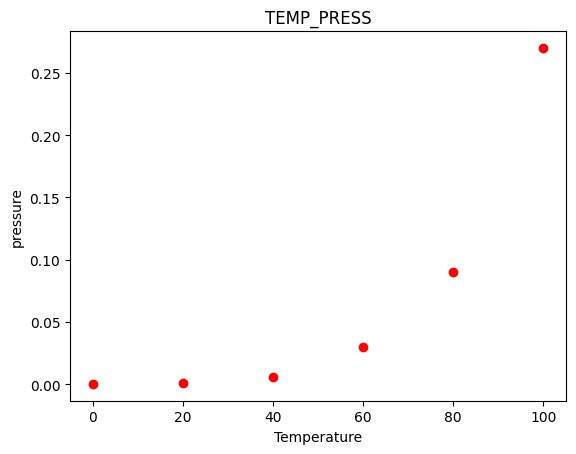

In [83]:
plt.scatter(x,y,color='r')
plt.xlabel('Temperature')
plt.ylabel('pressure')
plt.title('TEMP_PRESS')

In [84]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred



array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0.5, 1.0, 'temp_predval')

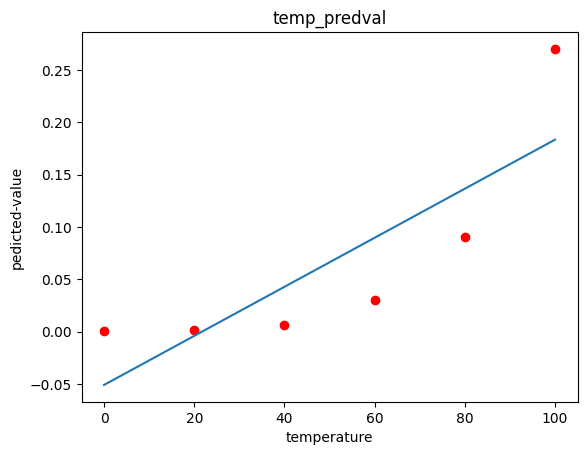

In [85]:
plt.scatter(x,y,color='r')
plt.plot(x,y_pred)
plt.xlabel('temperature')
plt.ylabel('pedicted-value')
plt.title('temp_predval')

In [86]:
#slope
print('slope is',model.coef_)

slope is [0.002342]


In [87]:
print('the constant is',model.intercept_)

the constant is -0.05086666666666667


In [88]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [89]:
MAPE=mean_absolute_percentage_error(y,y_pred)
MAPE

44.775078189300416

In [90]:
r2_sc=r2_score(y,y_pred)
r2_sc

0.690349972603981

In [91]:
#it has so many errror so to improvwe the model we are using plynomial regresson to inceease the features
 
from sklearn.preprocessing  import PolynomialFeatures
poly=PolynomialFeatures(degree=2) #now x will have 3 features
x_poly=poly.fit_transform(x)
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [92]:
#creating new model
model1=LinearRegression()
model1.fit(x_poly,y)
y_pred1=model1.predict(x_poly)
y_pred1

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [93]:
print('MAPE is',mean_absolute_percentage_error(y,y_pred1))

MAPE is 15.926055555558678


In [94]:
print('r2 score is',r2_score(y,y_pred1))

r2 score is 0.9568461098911795


Text(0.5, 1.0, 'predicted graph')

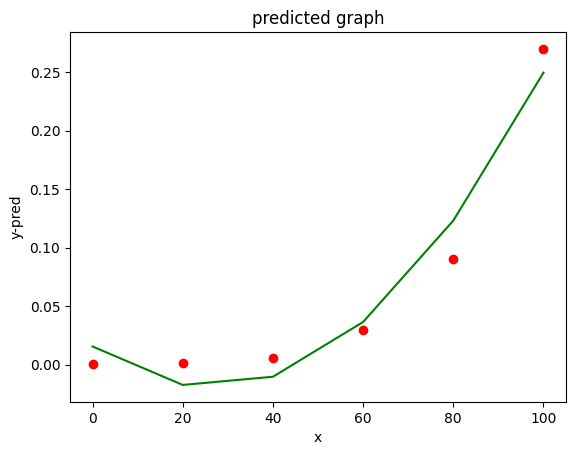

In [99]:
plt.scatter(x,y,color='r')
plt.plot(x,y_pred1,color='g')
plt.xlabel('x')
plt.ylabel('y-pred')
plt.title('predicted graph')

In [97]:
dframe=pd.DataFrame({'actual_value':y,'predicted_value':y_pred,'predicted_value_poly':y_pred1})
dframe

,actual_value,predicted_value,predicted_value_poly
0,0.0002,-0.050867,0.01555
1,0.0012,-0.004027,-0.01731
2,0.0060,0.042813,-0.01032
3,0.0300,0.089653,0.03652
4,0.0900,0.136493,0.12321
5,0.2700,0.183333,0.24975
